In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


# Problem 1(d)

In [60]:
from google.colab import files
uploaded = files.upload()

Saving wage.xlsx to wage (1).xlsx


In [61]:
df = pd.read_excel('wage.xlsx')
df['lwage'] = np.log(df['wage'])
df = df[['lwage','male']]

In [62]:
#Calculating the means and sample variances for males and females

lwage_m = df[df['male'] == 1]['lwage']
lwage_f = df[df['male'] == 0]['lwage']
num_m = len(lwage_m)
num_f = len(lwage_f)
mean_m = np.mean(lwage_m)
mean_f = np.mean(lwage_f)
sd_m = np.var(lwage_m)
sd_f = np.var(lwage_f)

#Calculating T
T = np.sqrt((num_m*num_f)/(num_m+num_f))*(np.log(sd_f) - np.log(sd_m))

#Calculating kappa hat
kappa_hat = ((num_m+num_f)*(np.sum((lwage_f-mean_f)**4) + np.sum((lwage_m-mean_m)**4)))/((np.sum((lwage_f-mean_f)**2) + np.sum((lwage_m-mean_m)**2))**2)

#Calculating the required statistic
stat = T/np.sqrt(kappa_hat - 1)


In [63]:
print("T:", T)
print("K hat:", kappa_hat)
print("Statistic:", stat)
if (stat > 1.64):
    print('Reject H0')
else:
    print('Fail to reject H0')

T: 2.360423027217803
K hat: 7.3781207090510135
Statistic: 0.934638088888326
Fail to reject H0


In [64]:
### Standard test

#Calculating the sample variances
var_f = np.var(lwage_f, ddof=1)
var_m = np.var(lwage_m, ddof=1)

#Calculating the F-stat
f_stat = var_f / var_m

#Calculating the degrees of freedom
df_f = num_f - 1
df_m = num_m - 1

#Calculating the p-value
p_value = 1 - stats.f.cdf(f_stat, df_f, df_m)




In [65]:
print("F-statistic:", f_stat)
print("p-value:", p_value)
if (p_value<0.05):
    print('Reject H0')
else:
    print('Fail to reject H0')

F-statistic: 1.0858707722186227
p-value: 0.04734658854083462
Reject H0


# Problem 3 (c)

In [66]:
n = 300
p =[]
for j in range(21):
    p.append(100 + 30*j)

var_gamma_greater = []
var_gamma_smaller = []
bias = []
list_var_gamma_greater = []
list_var_gamma_smaller = []
for i in p:
    if i < n:
        var_gamma_greater.append(i/(n-i))
        list_var_gamma_greater.append(i)

    if i > n:
        var_gamma_smaller.append(n/(i-n))
        bias.append((i-n)/i)
        list_var_gamma_smaller.append(i)

print('Variance when gamma < 1: ', np.round(var_gamma_greater,2))
print('Variance when gamma > 1: ', np.round(var_gamma_smaller,2))
print('Bias: ',np.round(bias,2))

Variance when gamma < 1:  [ 0.5   0.76  1.14  1.73  2.75  5.   14.  ]
Variance when gamma > 1:  [30.    7.5   4.29  3.    2.31  1.88  1.58  1.36  1.2   1.07  0.97  0.88
  0.81  0.75]
Bias:  [0.03 0.12 0.19 0.25 0.3  0.35 0.39 0.42 0.45 0.48 0.51 0.53 0.55 0.57]


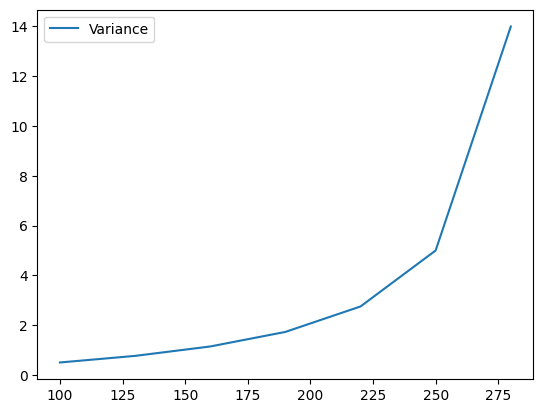

In [67]:
plt.plot(list_var_gamma_greater, var_gamma_greater, label='Variance')
plt.legend()
plt.show()

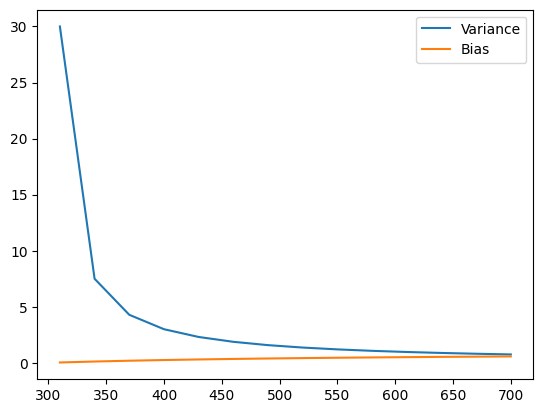

In [68]:
plt.plot(list_var_gamma_smaller, var_gamma_smaller, label='Variance')
plt.plot(list_var_gamma_smaller, bias, label='Bias')
plt.legend()
plt.show()

# `Problem 5(c, d)

In [214]:
rho1=0
rho2=0.5
rho3=0.95
y1 = np.empty(100)
y2 = np.empty(100)
y3 = np.empty(100)
B = np.zeros(100)
epsilon = np.random.normal(0, 1, 100)

y1[0] = 0
y2[0] = 0
y3[0] = 0
for t in range(1, 100):
    y1[t] = rho1 * y1[t-1] + epsilon[t]
    y2[t] = rho2 * y2[t-1] + epsilon[t]
    y3[t] = rho3 * y3[t-1] + epsilon[t]
x=np.arange(1, 101, 1, dtype=int)

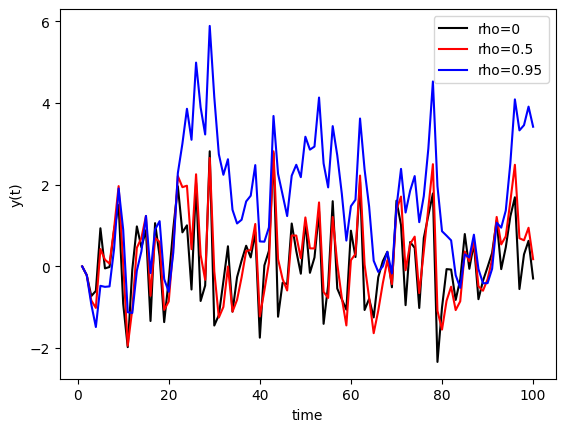

In [215]:
plt.plot(x, y1, color ="black",label="rho=0")
plt.plot(x, y2, color ="red",label="rho=0.5")
plt.plot(x, y3, color ="blue",label="rho=0.95")
plt.legend()
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

In [216]:
#OLS
ols_y1 = sm.regression.linear_model.OLS(y1, x).fit()
ols_y1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.067
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.304
Time:                        21:13:12   Log-Likelihood:                         -142.63
No. Observations:                 100   AIC:                                      287.3
Df Residuals:                      99   BIC:                                      289.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0018      0.002      1.033      0.304      -0.002       0.005
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.164
Skew:                           0.264   Prob(JB):                        0.559
Kurtosis:                       2.960   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
print(f"OLS estimator: {ols_y1.params[0]}, t-stat: {ols_y1.tvalues[0]}")


OLS estimator: 0.0017976313670394306, t-stat: 1.032744540047686


In [218]:
ols_y2 = sm.regression.linear_model.OLS(y2, x).fit()
ols_y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              3.969
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                      0.0491
Time:                        21:13:12   Log-Likelihood:                         -146.55
No. Observations:                 100   AIC:                                      295.1
Df Residuals:                      99   BIC:                                      297.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0036      0.002      1.992      0.049    1.46e-05       0.007
==============================================================================
Omnibus:                        3.796   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.795
Skew:                           0.463   Prob(JB):                        0.150
Kurtosis:                       2.767   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
print(f"OLS estimator: {ols_y2.params[0]}, t-stat: {ols_y2.tvalues[0]}")


OLS estimator: 0.003606493069855127, t-stat: 1.9923003174401772


In [220]:
ols_y3 = sm.regression.linear_model.OLS(y3, x).fit()
ols_y3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.450
Method:                 Least Squares   F-statistic:                              82.70
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                    1.04e-14
Time:                        21:13:13   Log-Likelihood:                         -188.98
No. Observations:                 100   AIC:                                      380.0
Df Residuals:                      99   BIC:                                      382.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0252      0.003      9.094      0.000       0.020       0.031
==============================================================================
Omnibus:                        2.914   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.578
Skew:                           0.393   Prob(JB):                        0.276
Kurtosis:                       3.040   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
print(f"OLS estimator: {ols_y3.params[0]}, t-stat: {ols_y3.tvalues[0]}")


OLS estimator: 0.025160616037195528, t-stat: 9.09380671228558


In [222]:
#Estimate Newey-West standard errors
ols_y1_nw = sm.regression.linear_model.OLS(y1, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y1_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.762
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.187
Time:                        21:13:13   Log-Likelihood:                         -142.63
No. Observations:                 100   AIC:                                      287.3
Df Residuals:                      99   BIC:                                      289.9
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0018      0.001      1.327      0.184      -0.001       0.004
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.164
Skew:                           0.264   Prob(JB):                        0.559
Kurtosis:                       2.960   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [223]:
ols_y2_nw = sm.regression.linear_model.OLS(y2, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y2_nw.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              2.630
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.108
Time:                        21:13:13   Log-Likelihood:                         -146.55
No. Observations:                 100   AIC:                                      295.1
Df Residuals:                      99   BIC:                                      297.7
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0036      0.002      1.622      0.105      -0.001       0.008
==============================================================================
Omnibus:                        3.796   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.795
Skew:                           0.463   Prob(JB):                        0.150
Kurtosis:                       2.767   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [224]:
ols_y3_nw = sm.regression.linear_model.OLS(y3, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y3_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.450
Method:                 Least Squares   F-statistic:                              24.39
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                    3.19e-06
Time:                        21:13:14   Log-Likelihood:                         -188.98
No. Observations:                 100   AIC:                                      380.0
Df Residuals:                      99   BIC:                                      382.6
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0252      0.005      4.939      0.000       0.015       0.035
==============================================================================
Omnibus:                        2.914   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.578
Skew:                           0.393   Prob(JB):                        0.276
Kurtosis:                       3.040   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [225]:
#Comparing t statistics
data = {'tstat': [ols_y1.tvalues[0], ols_y2.tvalues[0], ols_y3.tvalues[0]], 'tstat - NW': [ols_y1_nw.tvalues[0], ols_y2_nw.tvalues[0], ols_y3_nw.tvalues[0]]}
df = pd.DataFrame(data,index=["rho=0", "rho=0.5", "rho=0.95"])
df


,tstat,tstat - NW
rho=0,1.032745,1.327273
rho=0.5,1.992300,1.621596
rho=0.95,9.093807,4.938789


We fail to reject H0 at 5% significance level for ρ = 0 under both OLS and NW. We reject H0 at 5% significance level for ρ = 0.5 under OLS, while we do not reject H0 under NW.
We reject H0 at 1% significance level for ρ =0.95 under both OLS and NW. This means that for strong autocorrelation, εt tends to exhibit significant deviations from 0 and remains at those levels.



When ρ>0, OLS standard errors underestimate the true standard errors. So, the t-statistics from OLS are higher than the ones computed using the Newey-West standard errors.

Under OLS, i.e. when ρ=0, thecovariance terms are 0 by assumption GM3.

Under Newey-West, autocovariances of (x_t ϵ_t) of up to 4 lags are close to 0. This means standard errors are not estimated perfectly.